<a href="https://colab.research.google.com/github/asterli6/SIR_Model/blob/main/Totally_Radical_SIR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# Parameters
big_lambda = 12 # birth rate
small_e = .9 # algorithmic interference
N = 10000 # Total Population

# - Normalized Rates - #
alpha = .05 #radicalization rate
gamma = .05 #conversion rate
p = .95 #normalization rate as in the feed, but backwards....
w = .03 #Community Reinforcement as in online interactions
sigma = .01 #
epsilon = .01 #
mu_1 = .01 # death/departure rate
mu_2 = .3 # death/martyr rate
beta = 0.9 # Transmission

In [4]:
# SIR Model ODEs
def sir_model(t, y):
    S,E, I_l, I_h, D, R = y
    dSdt = (big_lambda - (( beta * S * (1- small_e) * (I_l + I_h)))) - (mu_1 * S)
    dEdt = (beta * S * (1- small_e) * (I_l +I_h)) - (gamma * E) - (mu_1 * E)
    dI_ldt = p*(gamma * E) - (w * sigma * I_l) - (mu_1 * I_l)
    dI_hdt = (1-p)*(gamma * E) + (w * sigma * I_l) - (epsilon * alpha * I_h) - (mu_1 * I_h)
    dDdt = (1-w)*(sigma * I_l) + (epsilon * alpha * I_h) - (mu_1 * D)
    dRdt = ((1-epsilon) * alpha * I_h) - (mu_1 * R) - (mu_2 * R)
    return [dSdt, dEdt, dI_ldt, dI_hdt, dDdt, dRdt]

In [5]:
# Initial conditions
#(S_0, I_0, R_0) = (0.95, 0.05, 0)
S0, E0, Il0, Ih0, D0, R0 = N*.95, N*.00, N*.04, N*.01, N*.00, N*.00 #remove N in DINN
y_initial = [S0, E0, Il0, Ih0, D0, R0]

In [6]:
# Time span (days)
t_span = [0, 300]
t_eval = np.linspace(0, 300, 500)

In [7]:
# Solve ODE using RK45
solution = solve_ivp(sir_model, t_span, y_initial, method='RK45', t_eval=t_eval)

# Extract results
t = solution.t
S, E, I_l, I_h, D, R = solution.y


I_l : 5670.938513547753
I_h : 392.8505429621602
R : 62.61428103980644


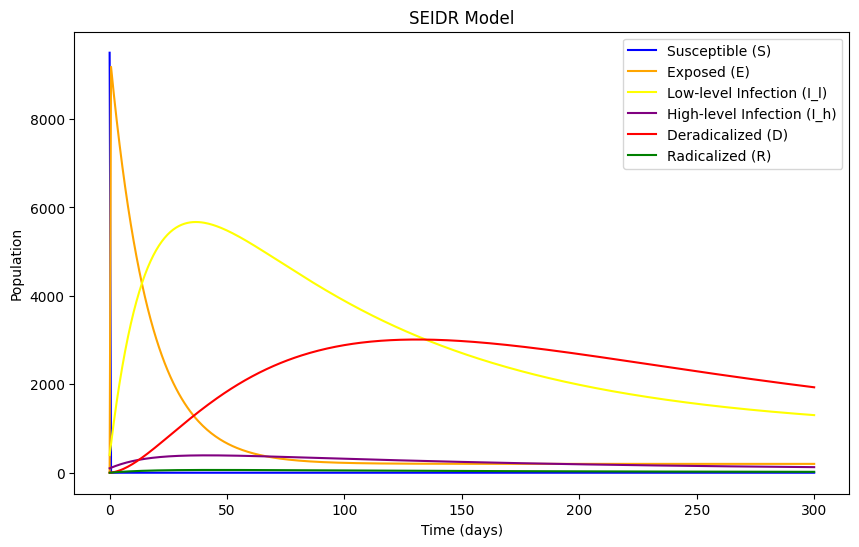

In [8]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Susceptible (S)", color="blue")
plt.plot(t, E, label="Exposed (E)", color="orange")
plt.plot(t, I_l, label="Low-level Infection (I_l)", color="yellow")
plt.plot(t, I_h, label="High-level Infection (I_h)", color="purple")
plt.plot(t, D, label="Deradicalized (D)", color="red")
plt.plot(t, R, label="Radicalized (R)", color="green")

print("I_l :", max(I_l))
print("I_h :",max(I_h))
print("R :",max(R))
plt.title("SEIDR Model")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()
plt.show()
